In [9]:
## Create another Conda Env just for yfinance because the Pandas version is not compatible with zipline
## pass the tickers that you want into the "tickers" as a list
## You can use the Nasdaq screener to select the Ticker, most of the ticker are availabel on Interactive Broker
## https://www.nasdaq.com/market-activity/stocks/screener
## download the csv

## default period is 243mo
## default directory is current directory with /data/daily

def ticker_data_generator(list_of_tickers , period="243mo" , interval ="1d"):
    import yfinance as yf
    import pandas as pd
    from datetime import datetime

    now = datetime.now()
    dt_string = now.strftime("%Y%m%d")
    

    import os

    if(interval != "1d"):
        if not os.path.exists(dt_string + "/minute"):
            os.makedirs(dt_string + "/minute")
        pathname = dt_string + "/minute/"
        
        
    else:
        if not os.path.exists(dt_string + "/daily"):
            os.makedirs(dt_string + "/daily")
        
        pathname = dt_string + "/daily/"
        pass


    

    def DOHL_to_dohl_mapper(dataframe):
        map_column = {"Date":"date","High":"high","Open":"open","Low":"low","Close":"close","Volume":"volume","Adj Close":"adj close"}
        df_new = dataframe.rename(columns=map_column)
        df_new.index.name="date"
        return df_new

    for ticker in list_of_tickers :
        df = DOHL_to_dohl_mapper(yf.download(ticker,period = period , interval = interval)).round(decimals=4).drop(columns=["adj close"]).to_csv( pathname + ticker + ".csv")





In [8]:
#for your test
tickers = ["AAPL"]

In [7]:
import pandas as pd
path_to_nasdaq_screener_csv = "nasdaq_screener_1609901871499.csv"
tickers = pd.read_csv(path_to_nasdaq_screener_csv).Symbol.tolist()
tickers[:5]
#This can create the list of ticker you want to download
#select your tickers
# https://www.nasdaq.com/market-activity/stocks/screener

['AACQ', 'AAL', 'AAON', 'AAPL', 'AAWW']

In [12]:
'''----main function----'''

ticker_data_generator(tickers,period="60d",interval="2m")

'''----main function----'''

*********100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*********************

'----main function----'

(array([ 58.,  65.,  76.,  85.,  92., 101., 121., 151., 193., 577.]),
 array([2012. , 2417.1, 2822.2, 3227.3, 3632.4, 4037.5, 4442.6, 4847.7,
        5252.8, 5657.9, 6063. ]),
 <BarContainer object of 10 artists>)

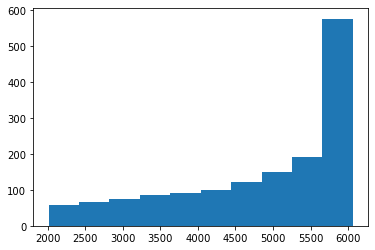

In [3]:
## this is to assure your CSV is not an empty one, that would screw up the ingestion process
## It can remove the file that was a weird shape

import os
import sys
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
dist = []
path = "/Users/matthewchuang/Documents/GitHub/algo_test/datas/20210106/minute"

for file in Path(path).iterdir():
    if file.is_file():
        df = pd.read_csv(file)
        if df.shape[0] < 2000:
            os.remove(file)
        else:
            dist.append(df.shape[0])

plt.hist(dist)

In [17]:
import yfinance as yf
test = yf.download("aapl",period = "32d" , interval = "2m")
test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-11-18 09:30:00-05:00,118.610001,119.019997,118.309998,118.684998,118.684998,4374489
2020-11-18 09:32:00-05:00,118.690002,118.730003,118.239998,118.377701,118.377701,1152326
2020-11-18 09:34:00-05:00,118.379997,118.809998,118.339996,118.735001,118.735001,1146747
2020-11-18 09:36:00-05:00,118.730003,118.930000,118.650002,118.889999,118.889999,851680
2020-11-18 09:38:00-05:00,118.879997,119.239998,118.680000,119.089996,119.089996,894795
...,...,...,...,...,...,...
2021-01-05 15:50:00-05:00,131.339996,131.449997,130.970001,131.070007,131.070007,1064063
2021-01-05 15:52:00-05:00,131.074997,131.130005,131.020004,131.100006,131.100006,447580
2021-01-05 15:54:00-05:00,131.110199,131.240005,130.929993,130.979996,130.979996,874111
